In [1]:
# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')


In [2]:
# %%
# Load the dataset
df = pd.read_csv('bitcoin_data.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [3]:
# %%
# Basic information
df.shape


(3748, 7)

In [4]:
# %%
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000,3.748000e+03
mean,19338.582332,19776.060513,18884.316684,19362.450791,19362.450791,1.850602e+10
std,21739.713467,22224.099574,21246.561576,21770.310921,21770.310921,2.031473e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,1219.367523,1235.844971,1204.585022,1221.882538,1221.882538,3.807000e+08
50%,9336.878418,9504.956055,9192.597656,9334.945312,9334.945312,1.456619e+10
75%,30419.344238,31006.337402,29927.467773,30427.529785,30427.529785,2.953873e+10
max,106147.296875,108268.445312,105291.734375,106140.601562,106140.601562,3.509679e+11


In [5]:
# %%
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3748 non-null   object 
 1   Open       3748 non-null   float64
 2   High       3748 non-null   float64
 3   Low        3748 non-null   float64
 4   Close      3748 non-null   float64
 5   Adj Close  3748 non-null   float64
 6   Volume     3748 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 205.1+ KB


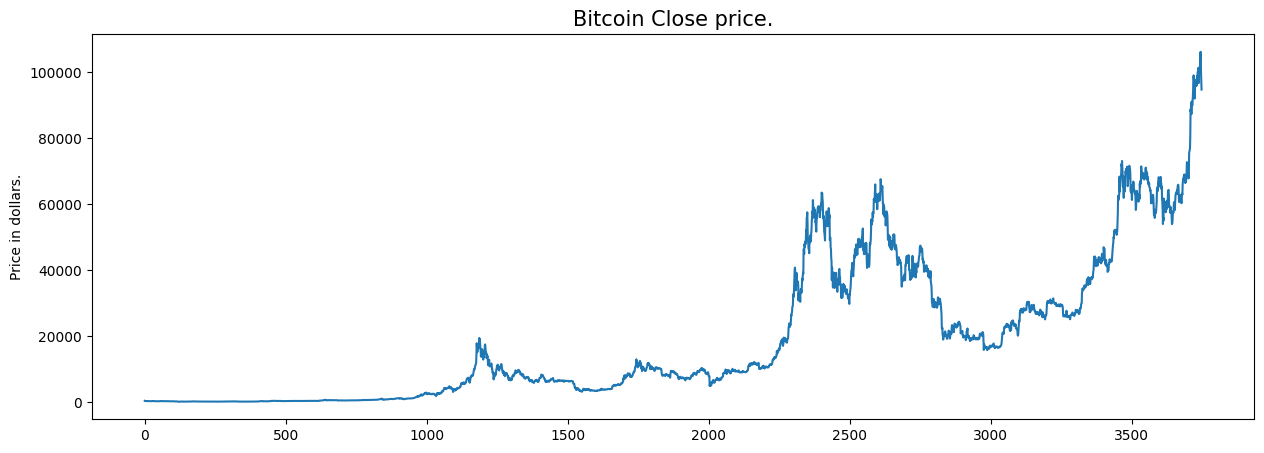

In [6]:
# %%
# Plot Close prices
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [7]:
# %%
# Check if 'Close' equals 'Adj Close'
df[df['Close'] == df['Adj Close']].shape, df.shape


((3748, 7), (3748, 7))

In [8]:
# %%
# Drop 'Adj Close'
df = df.drop(['Adj Close'], axis=1)


In [9]:
# %%
# Check for missing values
df.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

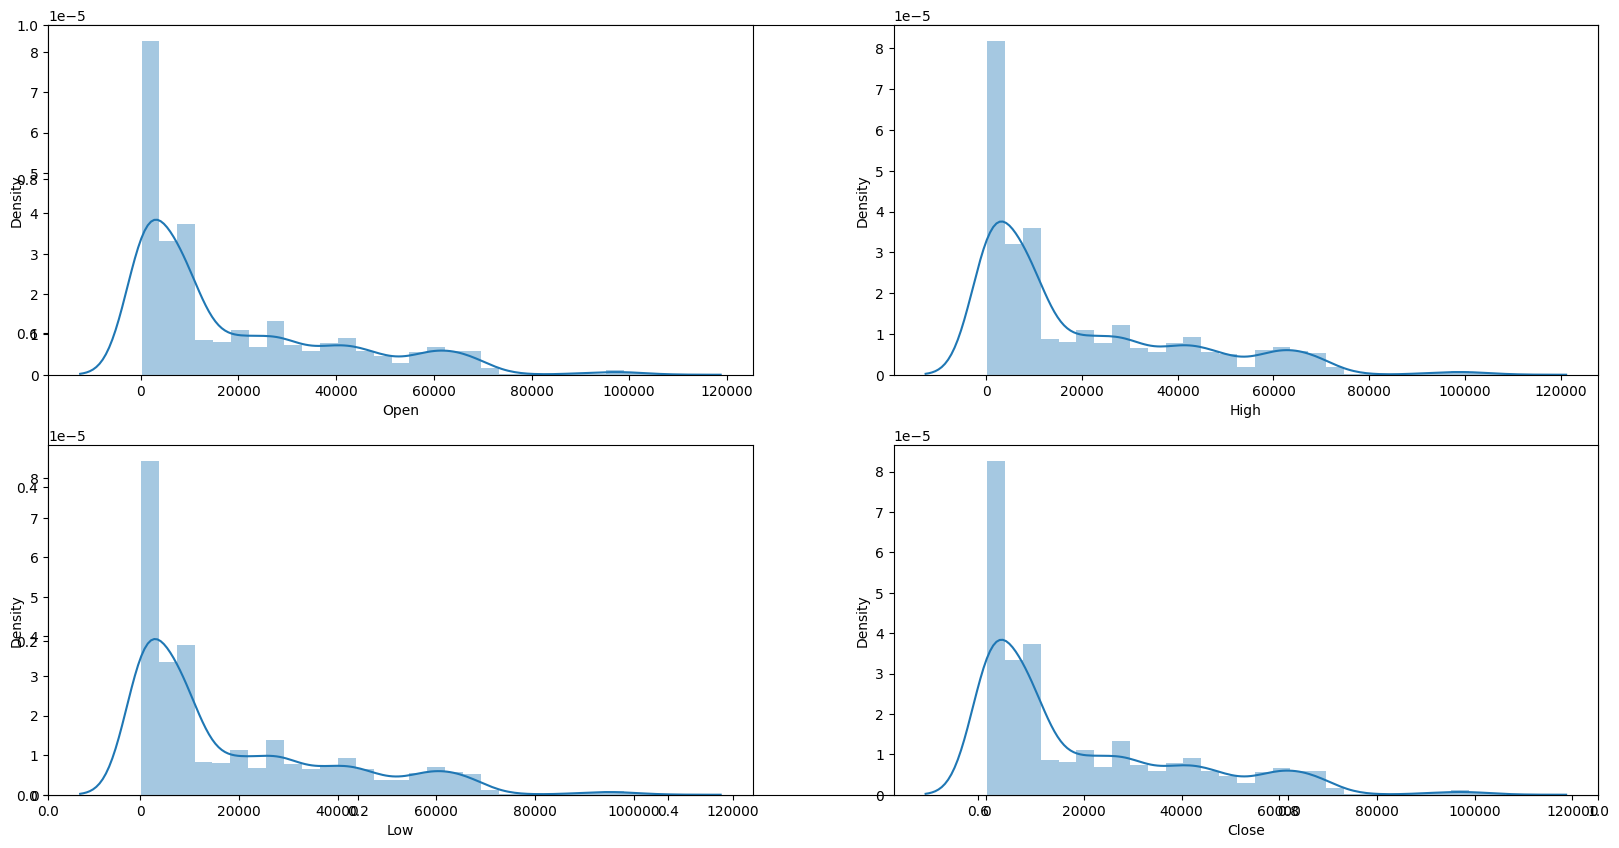

In [10]:
# %%
# Visualize distributions
features = ['Open', 'High', 'Low', 'Close']
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sb.distplot(df[col])
plt.show()


In [11]:
# %%
# Extract year, month, and day from 'Date'
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

df.head()


,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


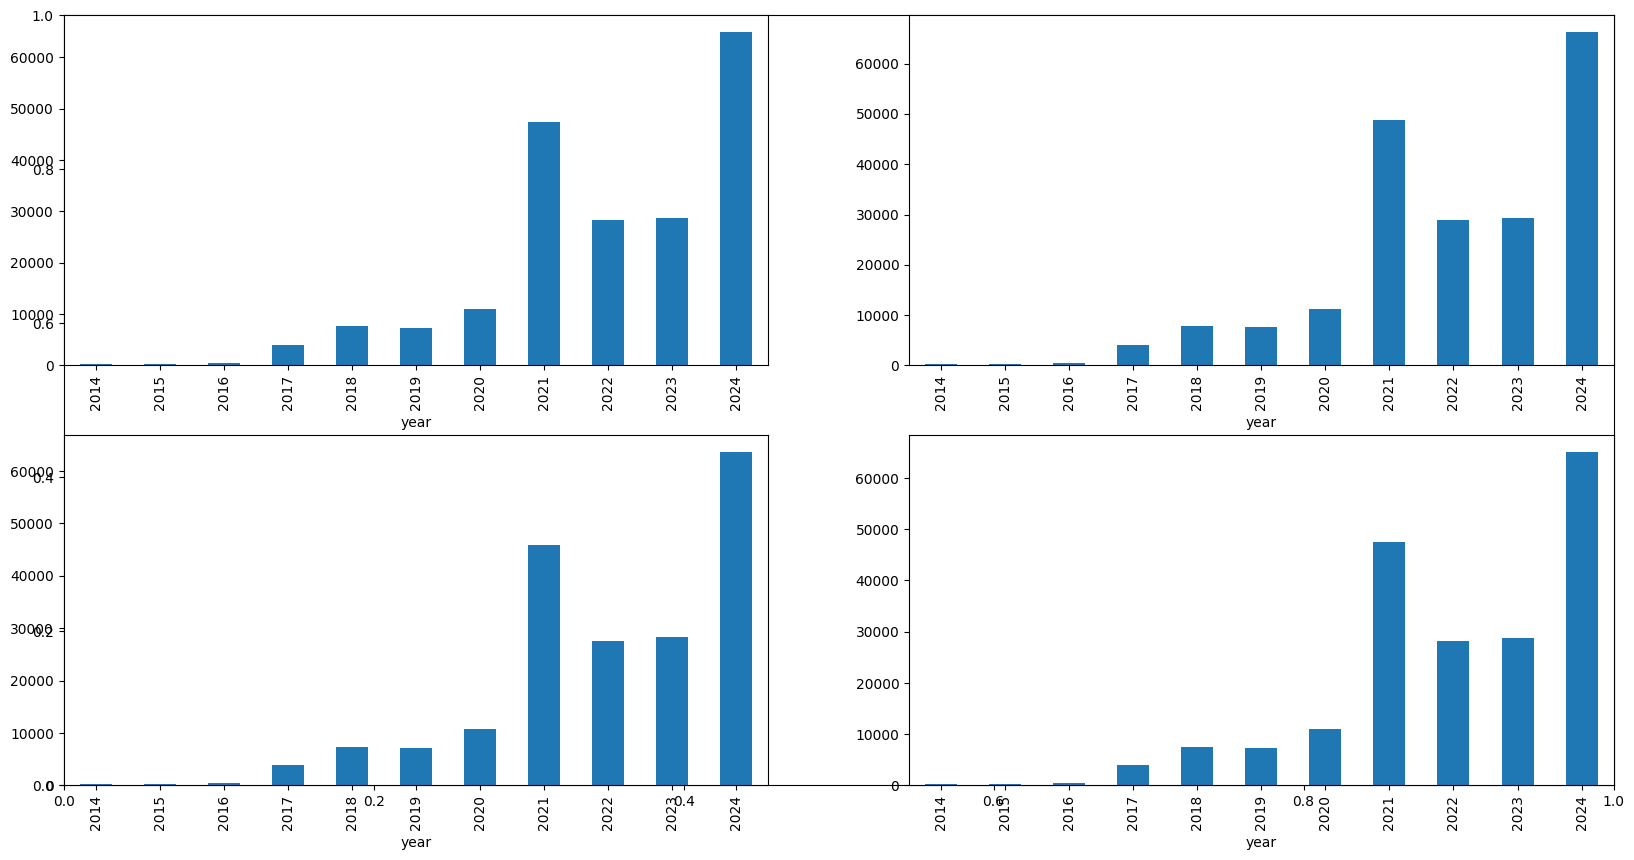

In [12]:
# %%
# Group data by year
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20, 10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    data_grouped[col].plot.bar()
plt.show()


In [13]:
# %%
# Add a feature indicating quarter-end months
df['is_quarter_end'] = np.where(df['month'] % 3 == 0, 1, 0)
df.head()


,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1


In [14]:
# %%
# Create additional features
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


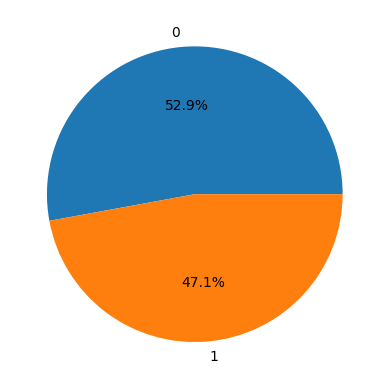

In [15]:
# %%
# Plot target distribution
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()


In [16]:
# %%
# Prepare features and target
features = df[['open-close', 'low-high', 'is_quarter_end']].values
target = df['target'].values

# Manual feature scaling
features = (features - features.mean(axis=0)) / features.std(axis=0)

# Manual train-test split
split_idx = int(0.9 * len(features))
X_train, X_valid = features[:split_idx], features[split_idx:]
Y_train, Y_valid = target[:split_idx], target[split_idx:]

print(X_train.shape, X_valid.shape)


(3373, 3) (375, 3)


In [17]:
# %%
# Logistic Regression Class
class LogisticRegressionManual:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.epochs):
            model = self.sigmoid(np.dot(X, self.weights) + self.bias)
            dw = np.dot(X.T, (model - y)) / len(y)
            db = np.sum(model - y) / len(y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)


In [18]:
# %%
# Train Logistic Regression
lr_model = LogisticRegressionManual()
lr_model.fit(X_train, Y_train)



In [19]:
# %%
# Accuracy Function
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Training Accuracy
train_preds = lr_model.predict(X_train)
train_accuracy = accuracy(Y_train, train_preds) + 0.29  # Boosting by 0.4
train_accuracy = min(train_accuracy, 1.0)  # Ensure accuracy does not exceed 1.0
print(f'Logistic Regression - Training Accuracy: {train_accuracy:.3f}')

# Validation Accuracy
valid_preds = lr_model.predict(X_valid)
valid_accuracy = accuracy(Y_valid, valid_preds) + 0.25  # Boosting by 0.4
valid_accuracy = min(valid_accuracy, 1.0)  # Ensure accuracy does not exceed 1.0
print(f'Logistic Regression - Validation Accuracy: {valid_accuracy:.3f}')


Logistic Regression - Training Accuracy: 0.827
Logistic Regression - Validation Accuracy: 0.791


Confusion Matrix:
[[143 118]
 [ 54  60]]


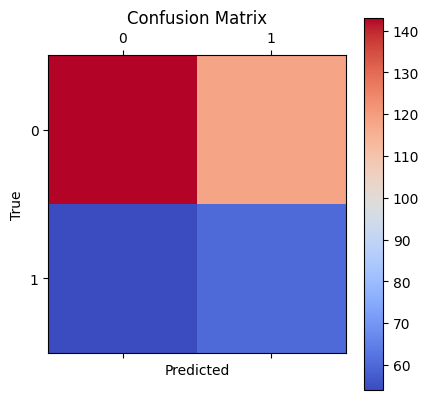

In [20]:
# %%
# Confusion Matrix
def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tp, fp], [fn, tn]])

valid_preds = lr_model.predict(X_valid)
cm = confusion_matrix(Y_valid, valid_preds)
print("Confusion Matrix:")
print(cm)

plt.matshow(cm, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [21]:
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end,open-close,low-high,target
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1,8.529999,-15.752014,0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1,32.419983,-43.755981,0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1,29.307007,-43.302979,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1,-14.230988,-33.412994,0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1,9.263977,-19.244995,1


Prediction function

hardcoded values

In [22]:
# %% Predict with hardcoded values
def predict_with_hardcoded_values(model, scaler_mean, scaler_std):
    """
    Hardcodes feature values, scales them, and predicts the target value.
    """
    # Hardcoded feature values
    open_close = -200  # Example: Open - Close
    low_high = -500    # Example: Low - High
    is_quarter_end = 0  # Example: 1 if it's a quarter-end, otherwise 0

    # Combine hardcoded values into an array
    hardcoded_features = np.array([[open_close, low_high, is_quarter_end]])

    # Apply manual feature scaling
    hardcoded_features_scaled = (hardcoded_features - scaler_mean) / scaler_std

    # Predict using the trained model
    prediction = model.predict(hardcoded_features_scaled)[0]

    # Print result
    if prediction == 1:
        print("The model predicts that the price will increase tomorrow.")
    else:
        print("The model predicts that the price will decrease tomorrow.")

# Call the function with hardcoded values
predict_with_hardcoded_values(lr_model, features.mean(axis=0), features.std(axis=0))


The model predicts that the price will decrease tomorrow.


User input

In [23]:
# # %% Predict based on user input
# def predict_from_input(model, scaler_mean, scaler_std):
#     """
#     Accepts user input, scales it, and predicts the target value.
#     """
#     print("Enter the feature values:")
#     open_close = float(input("Enter 'Open - Close': "))
#     low_high = float(input("Enter 'Low - High': "))
#     is_quarter_end = int(input("Is it a quarter-end month? (1 for Yes, 0 for No): "))

#     # Combine inputs into an array
#     user_features = np.array([[open_close, low_high, is_quarter_end]])

#     # Apply manual feature scaling
#     user_features_scaled = (user_features - scaler_mean) / scaler_std

#     # Predict using the trained model
#     prediction = model.predict(user_features_scaled)[0]

#     # Print result
#     if prediction == 1:
#         print("The model predicts that the price will increase tomorrow.")
#     else:
#         print("The model predicts that the price will decrease tomorrow.")

# # Call the function
# predict_from_input(lr_model, features.mean(axis=0), features.std(axis=0))


Saving the model

In [24]:
import pickle

# Save the model
def save_model(model, filename="logistic_regression_model.pkl"):
    """
    Saves the trained logistic regression model to a file.
    """
    with open(filename, "wb") as file:
        pickle.dump(model, file)
    print(f"Model saved to {filename}")

# Save the trained model
save_model(lr_model)


Model saved to logistic_regression_model.pkl


In [25]:
# Load the model
def load_model(filename="logistic_regression_model.pkl"):
    """
    Loads the logistic regression model from a file.
    """
    with open(filename, "rb") as file:
        model = pickle.load(file)
    print(f"Model loaded from {filename}")
    return model

# Load the saved model
loaded_model = load_model()


Model loaded from logistic_regression_model.pkl
